## COMP5721M: Programming for Data Science

## Coursework 3: Data Analysis Project

Last modified: 3 December 2023


# _Global Superstore Analytics: A Holistic Examination of Sales Patterns, Product Categories, and Customer Clusters_





* Ao Shen, ml22as4@leeds.ac.uk
* Pei Ma, sc23pm@leeds.ac.uk
* Yaojia Wu, sc23wy@leeds.ac.uk
* Seyed Shahab Ahsrafzadeh, mm23ssa@leeds.ac.uk

# Project Plan

## The Data 

 The Global Superstore dataset (https://www.kaggle.com/datasets/anandaramg/global-superstore?rvi=1) provides a comprehensive snapshot of sales and orders within a global retail setting. It stands as a valuable asset for diverse data analysis tasks, shedding light on sales and profit patterns, customer behaviour, and overall retail performance. The dataset is synthetic and designed for educational purposes, specifically for use with Tableau. Despite its synthetic nature, it offers ample opportunities to explore data and perform various analysis tasks. The insights and skills gained from performing the analysis tasks are applicable to real-world settings and scenarios.

### Data Collection:

The data collection of any company stems from a process embedded in its business operations. This involves the upkeep of sales records and financial data through bookkeeping. Operational facets, including order processing systems and customer relationship tools, provide insights into the dynamics of order fulfilment and customer engagement. Logistics and supply chain systems provide granular details on shipping and product movement.

### Dataset Structure:

The dataset is structured into several key categories, each contributing to a holistic understanding of the retail landscape. For each column, the type is also provided in parenthesis:

1-	Customer Information:

*	Customer_ID: Unique identifier for each customer. (Data Type: Object)

*	Customer_Name: Name of the customer. (Data Type: Object)

*	Segment: Segment to which the customer belongs which are consumer, home office and Corporate. (Data Type: Object)

*	Country: Country of the customer. (Data Type: Object)

*	City: The city where the order was placed. (Data Type: Object)

*	State: The state or region within the country. (Data Type: Object)

*	Region: The region where the order was placed. (Data Type: Object)

2-	Order Details:
*	Order_ID: Unique identifier for each order in each region. (Data Type: Object)

*	Order_Date: Date when the order was placed. (Data Type: Object)

*	Ship_Date: Date when the order was shipped. (Data Type: Object)

*	Order_Priority: Priority assigned to the order. (Data Type: Object)

*	Ship_Mode: The shipping mode used for the order. (Data Type: Object)

3-	Product Information:
*	Product_ID: Unique identifier for each product in each region. (Data Type: Object)

*	Product_Name: Name of the product. (Data Type: Object)

*	Category: Category to which the product belongs. (Data Type: Object)
    
    Consisting of: Technology, Office Supplies and Furniture

*	Sub_Category: Sub-category of the product. (Data Type: Object)
    
    For example: Phone, Copier, Table, Appliances, papers….


4-	Sales and Profits:

*	Sales: Sales amount for each order in dollars. (Data Type: Int64)

*	Profit: Profit generated from each order in dollars. (Data Type: Float64)

*	Discount: The discount percentage applied to the order. (Data Type: Float64)

*	Shipping_Cost: The cost of shipping for the order in dollars. (Data Type: Float64)

5-	Additional Information:

*	Market: The market or region where the superstore operates. (Data Type: Object)

*	Market2: Another column related to market information. (Data Type: Object)

*	Weeknum: The week number when the order was placed. (Data Type: Int64)

*	Year: The year in which the order was placed. (Data Type: Int64)



### Context of data

In tackling the vast Global Superstore dataset, it's crucial to be aware of certain challenges that might impact our analysis. The dataset's timeframe covers historical data, but we need to be cautious. The dataset's temporal scope introduces a consideration for the dynamic nature of business environments. Insights drawn from historical data may not seamlessly translate to current market conditions, urging analysts to be mindful of the evolving nature of retail landscapes. Beyond the dataset's boundaries, external influences, such as economic shifts and industry trends, cast a meaningful shadow.

Data quality is another consideration. The accuracy and reliability of the dataset depend on the integrity of the underlying systems and processes that generate the data. Keeping these factors in mind allows analysts to navigate the dataset more effectively, ensuring a more accurate and contextually grounded interpretation of the insights it provides.

## Project Aim and Objectives

This project aims to explore the Global Superstore dataset, uncovering insights into the company's operations and providing actionable strategies for decision-making within a global superstore. The significance of this analysis lies in its practical applicability to any real-world business scenario, emphasising the importance of a data-driven strategy in a modern business environment.

The project systematically unfolds through two main parts in 4 objectives. The first part is a comprehensive exploratory data analysis aimed to gain a better understanding of the data and business operations. The second part,aimed to facilitate marketing strategies, carries out a clustering technique to divide customers into groups according to their purchasing characteristics. The exploratory data analysis part is achieved through 3 objectives, starting with an overview of sales and profits and analysing their trends over time. The second objective delves into specific areas, such as sales and profits of product categories and geographic regions, and the third objective explores logistic operations, aiming to identify patterns and potential areas for improvement.

In the final objective, the analysis culminates in developing a clustering algorithm to categorise customers into different segments. This categorisation is achieved by considering three key features related to customers, including the last time they made a purchase, the monetary value of their total purchases, and the number of purchases made throughout the entire period. By categorising customers, the project strives to offer insights into consumer behaviours, providing a foundation for tailoring marketing approaches for enhanced engagement and profitability.
By addressing these objectives, the project aligns with the goal of providing valuable insights to optimise operational strategies and improve customer satisfaction within the global superstore.



### Specific Objective(s)


* __Objective 1:__ _analysis of sale and profit trends and employing a model to predict the trends of profit in the future_
* __Objective 2:__ _breaking down sales and profit to sub-categories of products and geographical regions_
* __Objective 3:__ _analysis of shipping modes and shipping time_
* __Objective 4:__ _cluster analysis of customers_

## System Design 

### Architecture
**Figure 1**


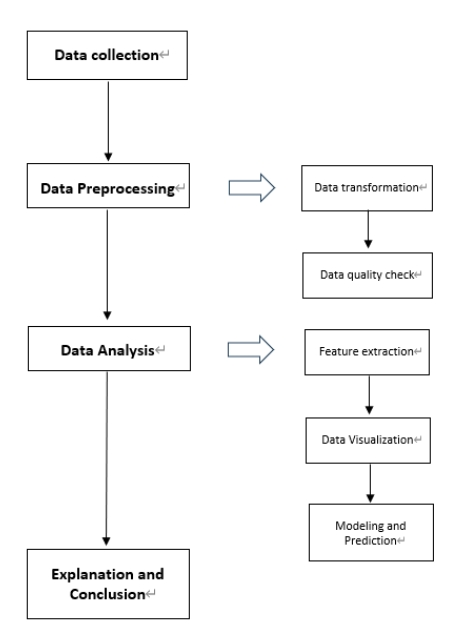


The overview architecture of the project is structured in Figure 1. The project commences with data collection.   It then goes through data processing. The original dataset, available in a txt format, was transformed into a csv format for ease of subsequent analysis. Data collected as input can be subjected to errors due to typo errors, false errors, etc. Subsequently, a data quality assessment was conducted, examining the overall data status, missing values, and other data quality issues. The date-type data were converted into datetime format, and irrelevant columns were eliminated.

Transitioning to the data analysis phase, For the exploratory analysis part, pivotal features in accordance with individual objectives were customised. This was followed by visualisations, subsequent modelling, and data forecasting, aligning with the outlined objectives.  Finally, explanations and conclusions are provided for the visualised data.      

Regarding the unsupervised machine learning task, following data preparation, the features are extracted and then scaled to ensure consistent weighting. The model is iteratively run through a parameter tuning loop to find the optimal settings. The final model is evaluated using relevant metrics to provide insight into the approach's effectiveness.


### Processing Modules and Algorithms

* _data transformation to convert data from txt format to csv and convert date-type data to datetime type._
* _plot pie charts, bar charts, line graphs, heatmaps and maps for the purpose of data visualisation_
* _gain insights into customer behaviour through RFM and clustering for customer segmentation_
* _use the Long Short-Term Memory (LSTM) algorithm to predict the profit trend in the future_


# Program Code



In [1]:
!pip install geopandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import calendar
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
import geopandas as gpd
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import Sequential
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D

### _Data Preparation_

The first step is to read the dataset from the file. We use pandas to convert the raw data to a dataframe.

In [3]:
#convert format to csv
df = pd.read_csv("Global Superstore.txt", sep="	")

df.columns = df.columns.str.replace("-","_")
df.columns = df.columns.str.replace(" ","_")

In [4]:
df.head(3)

,Category,City,Country,Customer_ID,Customer_Name,Discount,Market,记录数,Order_Date,Order_ID,...,Sales,Segment,Ship_Date,Ship_Mode,Shipping_Cost,State,Sub_Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32


## Data quality check:
1.Identify data types and if the data contains missing values and duplicate value

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer_ID     51290 non-null  object 
 4   Customer_Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order_Date      51290 non-null  object 
 9   Order_ID        51290 non-null  object 
 10  Order_Priority  51290 non-null  object 
 11  Product_ID      51290 non-null  object 
 12  Product_Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row_ID          51290 non-null  int64  
 17  Sales           51290 non-null 

Following Code checks whether any missing value exists in the whole data

In [6]:
df.isnull().any(axis=1).sum()

0

In [7]:
print(len(df['Order_ID'].unique()))

25035


In [8]:
df.shape

(51290, 27)

From the output, the dataset does not contain missing values. Order_id contains duplicate values.However, upon checking, orders are from different product categories, therefore it is normal to have duplicates.

 2.Identify if the numeric feilds and all fields contains outlier values respectively

In [9]:
df.describe(percentiles=[0.01,0.25,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
Discount,51290.0,0.142908,0.212280,0.000,0.00000,0.00,0.00,0.20,0.70000,0.850
记录数,51290.0,1.000000,0.000000,1.000,1.00000,1.00,1.00,1.00,1.00000,1.000
Profit,51290.0,28.610982,174.340972,-6599.978,-351.50565,0.00,9.24,36.81,587.35995,8399.976
Quantity,51290.0,3.476545,2.278766,1.000,1.00000,2.00,3.00,5.00,11.00000,14.000
Row_ID,51290.0,25645.500000,14806.291990,1.000,513.89000,12823.25,25645.50,38467.75,50777.11000,51290.000
Sales,51290.0,246.498440,487.567175,0.000,4.00000,31.00,85.00,251.00,2301.00000,22638.000
Shipping_Cost,51290.0,26.375818,57.296810,0.002,0.20000,2.61,7.79,24.45,286.75430,933.570
Year,51290.0,2012.777208,1.098931,2011.000,2011.00000,2012.00,2013.00,2014.00,2014.00000,2014.000
weeknum,51290.0,31.287112,14.429795,1.000,2.00000,20.00,33.00,44.00,53.00000,53.000


In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Category,51290,3,Office Supplies,31273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,51290,3636,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,51290,147,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,51290,4873,JG-158051,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Name,51290,795,Muhammed Yedwab,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discount,51290.0,NaN,NaN,NaN,0.142908,0.21228,0.0,0.0,0.0,0.2,0.85
Market,51290,7,APAC,11002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
记录数,51290.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Order_Date,51290,1430,2014-06-18 00:00:00.000,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_ID,51290,25035,CA-2014-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By checking the outputs, there are no outlier values in any of the above fields.

## Data Preprocessing and transformation

Following codes transform the data so that it can be used in the analysis, however some part of the transformations are carried out in the objectives themselves

Next cell changes the string order and ship date formats to a pandas datetime64 object

In [11]:
new_order_dates = df['Order_Date'].str.split(' ').str[0]
df["Order_Date"] =  pd.to_datetime(new_order_dates)
new_ship_dates = df['Ship_Date'].str.split(' ').str[0]
df["Ship_Date"] =  pd.to_datetime(new_ship_dates)

Next Code deletes the unwanted column which contains a constant value in all records from the dataset

In [12]:
df.drop(['记录数'], axis='columns', inplace=True)
df.to_csv("Global Superstore.csv")

Next we will proceed to main codes of the analysis part.

## Codes related to analysis of sale and profit trends (objective 1)



#### Add date and month colums to the dataset

Use pandas.Series.dt to extract date, month.

In [13]:
df_new = df
df_new['order_date'] = df.Order_Date.dt.day
df_new['order_month'] = df.Order_Date.dt.month
print(df.columns.values)

['Category' 'City' 'Country' 'Customer_ID' 'Customer_Name' 'Discount'
 'Market' 'Order_Date' 'Order_ID' 'Order_Priority' 'Product_ID'
 'Product_Name' 'Profit' 'Quantity' 'Region' 'Row_ID' 'Sales' 'Segment'
 'Ship_Date' 'Ship_Mode' 'Shipping_Cost' 'State' 'Sub_Category' 'Year'
 'Market2' 'weeknum' 'order_date' 'order_month']


Columns has been added to the dataset.

#### Filtering out the required columns
To facilitate subsequent analyses, columns related to returns and time are filtered out

In [14]:
df_sales_time = df_new[['Order_ID','Profit','Quantity','Sales','Order_Date','weeknum','order_date','order_month','Year']]
df_sales_time.head()

,Order_ID,Profit,Quantity,Sales,Order_Date,weeknum,order_date,order_month,Year
0,CA-2011-130813,9.3312,3,19,2011-01-07,2,7,1,2011
1,CA-2011-148614,9.2928,2,19,2011-01-21,4,21,1,2011
2,CA-2011-118962,9.8418,3,21,2011-08-05,32,5,8,2011
3,CA-2011-118962,53.2608,2,111,2011-08-05,32,5,8,2011
4,CA-2011-146969,3.1104,1,6,2011-09-29,40,29,9,2011


Grouping sales and profit by quarters.

In [15]:
year_quarter_item = df_sales_time[['Order_ID','Sales','Order_Date']].groupby(by=[df_sales_time.Order_Date.dt.year, df_sales_time.Order_Date.dt.quarter])[
    'Sales'].sum()
Year_Quarter = [f'({index[0]}, {index[1]})' for index in year_quarter_item.index]
year_quarter_item
print(Year_Quarter)

['(2011, 1)', '(2011, 2)', '(2011, 3)', '(2011, 4)', '(2012, 1)', '(2012, 2)', '(2012, 3)', '(2012, 4)', '(2013, 1)', '(2013, 2)', '(2013, 3)', '(2013, 4)', '(2014, 1)', '(2014, 2)', '(2014, 3)', '(2014, 4)']


### Visual Analysis of the Relationship Between Profit and Time

Define a function to produce line graph and histogram about the relationship between profit and month.

In [16]:
def monthly_profit():

  df_group_month = df_sales_time.groupby(['order_month'])['Profit'].agg('sum').reset_index()
  df_group_month_sale = df_sales_time.groupby(['order_month'])['Sales'].agg('sum').reset_index()
  plt.figure(figsize=(10,5))
  df_group_month.head()

  x = df_group_month['order_month']
  y1 = df_group_month['Profit'].round()
  y2 = df_group_month_sale['Sales']

  plt.bar(x=x, height=y1 ,color = 'steelblue',alpha = 0.8,label='profit')
  plt.plot(x,y1,marker='*',color='red',label="Profit")
  plt.plot(x,y2,label='Sales',marker='*',color='green')
  plt.xlabel("Month")
  plt.ylabel("Profit")
  plt.title("Monthly Profit")
  plt.legend(loc='upper left')

  for y in [y1,y2]:
    for x1,yy in zip(x,y):
      plt.text(x1,yy+1, str(yy), ha='center',va = 'bottom',fontsize = 7)

  plt.show()
  plt.savefig('Monthly Profit')####Define a function to produce line graph and histogram about the relationship between profit and date.

Define a function to produce line graph and histogram about the relationship between profit and date.

In [17]:
def date_profit():

  df_group_date = df_sales_time.groupby(['order_date'])['Profit'].agg('sum').reset_index()
  df_group_date_sale = df_sales_time.groupby(['order_date'])['Sales'].agg('sum').reset_index()
  plt.figure(figsize=(20,12))
  df_group_date.head()

  x = df_group_date['order_date']
  y1 = df_group_date['Profit'].round()
  y2 = df_group_date_sale['Sales']
  labels = x

  plt.bar(x=x, height=y1 ,color = 'steelblue',alpha = 0.8,label='profit')
  plt.plot(x,y1,marker='*',color='red',label="Profit")
  plt.plot(x,y2,label='Sales',marker='*',color='green')
  plt.xlabel("Date")
  plt.ylabel("Profit")
  plt.title("Daily Profit")
  plt.legend(loc='upper left')

  for y in [y1,y2]:
    for x1,yy in zip(x,y):
      plt.text(x1,yy+1, str(yy), ha='center',va = 'bottom',fontsize = 7)

  plt.show()
  plt.savefig('Daily Profit')

Define a function to produce bar chart about the relationship between sales and quarters.

In [18]:
def year_quarter():

  plt.figure(figsize=(12,5))
  a = sns.barplot(data = year_quarter_item, x=Year_Quarter,y=year_quarter_item.values)
  plt.title("Quartly Sales")
  plt.xlabel("(Year,Quarter)")
  plt.ylabel("Sales")
  plt.xticks(rotation=45)
  plt.bar_label(a.containers[0])
  plt.show()


### Plotting line charts to examine the trends in profit and sales from 2011-2013

The first graph illustrates the annual trend comparison of sales revenue, while the second graph displays the annual trend comparison of profit.

In [19]:
def ymplot(df,label_y,label_m):

  y_list = np.sort(df[label_y].unique().tolist())[:-1]
  m_list = np.sort(df[label_m].unique().tolist())
  markers = ['o','^','v']

  fig, axs = plt.subplots(1, 2, figsize = (18, 8), dpi = 100)

  for i in range(len(y_list)):
    profit_m = []
    money_m = []
    index1 = df[label_y] == y_list[i]
    for j in range(len(m_list)):
      index2 = df[label_m] == m_list[j]
      profit_m.append(df.loc[index1 & index2,'Profit'].sum())
      money_m.append(df.loc[index1 & index2, 'Sales'].sum())

    axs[0].plot(m_list,profit_m, linestyle = '-.', alpha = 0.8, marker = markers[i],label = y_list[i])
    axs[1].plot(m_list,money_m, linestyle = '-.', alpha = 0.8, marker = markers[i],label = y_list[i])
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Profit')
    axs[0].set_title('Trends in Profit from 2011 to 2013')
    axs[1].set_xlabel('Month')
    axs[1].set_ylabel('Sales')
    axs[1].set_title('Trends in Sales from 2011 to 2013')
    axs[0].legend()
    axs[1].legend()

  plt.show()

### Using the Long Short-Term Memory (LSTM) algorithm to predict the profit

Extracting columns for time and profit.

In [20]:
order_total_date = df_sales_time.groupby('Order_Date').agg(Profit=('Profit','sum'))
series = order_total_date

Plotting the overall trend of the profit

In [21]:
def profit():
  order_total_date.plot()
  plt.show()

Define a function to transform the data into a supervised learning set, filling NaN values resulting from shifting with zeros.

In [22]:
def timeseries_to_supervised(data,lag=1):
    df=pd.DataFrame(data)
    columns=[df.shift(i) for i in range(1,lag+1)]
    columns.append(df)
    df=pd.concat(columns,axis=1)
    df.fillna(0,inplace=True)
    return df

Create a scaler to scale the data in the dataset to the range of [-1, 1].

In [23]:
def scale(train,test):

    scaler=MinMaxScaler(feature_range=(-1,1))

    scaler=scaler.fit(train)

    train_scaled=scaler.transform(train)
    test_scaled=scaler.transform(test)
    return scaler,train_scaled,test_scaled

Perform inverse scaling on the predicted values using the previously trained scaler. Here, 'x' represents a one-dimensional array, and 'y' represents a real number.

In [24]:
def invert_scale(scaler,X,y):
    new_row=[x for x in X]+[y]
    array=np.array(new_row)
    array=array.reshape(1,len(array))
    invert=scaler.inverse_transform(array)
    return invert[0,-1]

Build an LSTM (Long Short-Term Memory) model.

In [25]:
def fit_lstm(train,batch_size,nb_epoch,neurons):
    # Separate the x and y in the dataset.
    X,y=train[:,0:-1],train[:,-1]
    # Concatenate 2D data into 3D data with a shape of[N*1*1]
    X=X.reshape(X.shape[0],1,X.shape[1])

    model=Sequential()
    model.add(LSTM(neurons,batch_input_shape=(batch_size,X.shape[1],X.shape[2]),stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')

    for i in range(nb_epoch):
        his=model.fit(X,y,batch_size=batch_size,verbose=1,shuffle=False)
        model.reset_states()
    return model

Start single-step prediction

In [26]:
from keras import backend as K
def forecast_lstm(model,batch_size,X):

    X=X.reshape(1,1,len(X))
    X = K.cast_to_floatx(X)
    yhat=model.predict(X,batch_size=batch_size)

    return yhat[0,0]

Data differencing transformation.

In [27]:
def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

Perform inverse differencing transformation on the predicted data.

In [28]:
def invert_difference(history,yhat,interval=1):
    return yhat+history[-interval]

Process the data by splitting it into training and testing sets, and then scaling the data.

In [29]:
raw_value=series.values
diff_value=difference(raw_value,0)

supervised=timeseries_to_supervised(diff_value,1)
supervised_value=supervised.values

testNum=100
train,test=supervised_value[:-testNum],supervised_value[-testNum:]

scaler,train_scaled,test_scaled=scale(train,test)

Build an LSTM model and train it with 1 sample, 5 epochs, and an LSTM layer with 4 neurons.

In [30]:
lstm_model=fit_lstm(train_scaled,1,1,4)
predictions=list()
for i in range(len(test_scaled)):
    X,y=test[i,0:-1],test[i,-1]
    yhat=forecast_lstm(lstm_model,1,X)
    yhat=invert_scale(scaler,X,yhat)
    yhat=invert_difference(raw_value,yhat,len(test_scaled)+1-i)
    predictions.append(yhat)

1/1 [==============================] - 0s 82ms/step


In [31]:
def plot_fit(data,pdata):
  plt.title('Result of fitting')
  plt.plot(data)
  plt.plot(pdata)
  plt.legend(['true','pred'])
  plt.show()

#### Autocorrelation Function plot and Partial Autocorrelation Function plot

 The autocorrelation coefficient is greater than 0, it indicates a positive correlation.

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_pacf():

  plt.figure(figsize=(12,8))
  plot_acf(order_total_date).show()

  plt.figure(figsize=(12,8))
  plot_pacf(order_total_date).show()

## Codes related to breakdown of sales and profit to sub-category of products and geographical regions (Objective 2)

### Codes for making queries for aggregate sale and profit of sub-categories

These new sub-datasets and calculations will be used in analysis and charts

In [33]:
#cleating a sub-dataset based on aggregate sales and profits of categories and sub-categories and cities
df_sales_profits = df.groupby(['Category', 'Sub_Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
sorted_df_sales = df_sales_profits.sort_values(['Sales'],ascending=False)
sorted_df_profits = df_sales_profits.sort_values(['Profit'],ascending=False)

# Identify best and worst sub-categories based on profits
best_subcategories = df_sales_profits.nlargest(5, 'Profit')
worst_subcategories = df_sales_profits.nsmallest(5, 'Profit')

# Calculate profit margin as a percentage for each sub-category
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100
# Group by sub-category and calculate the mean profit margin
df_sales_profits['Profit_Margin'] = (df_sales_profits['Profit'] / df_sales_profits['Sales']) * 100
df_Margin_profits_sorted = df_sales_profits.sort_values(by ='Profit_Margin',ascending=False)


# Following Codes calculates profit margin of sub-categories for each year
df['Year'] = pd.to_datetime(df['Order_Date']).dt.year.astype(int)

# Group by year and sub-category, calculate total profit and sales and the profit margin for each sub category
df_yearly_profit = df.groupby(['Year', 'Sub_Category'])[['Profit', 'Sales']].sum().reset_index()
df_yearly_profit['Profit_Margin'] = (df_yearly_profit['Profit'] / df_yearly_profit['Sales']) * 100

Following code calculates percentage of table products that are at loss

In [34]:
table_data_2014 = df[(df['Sub_Category'] == 'Tables') & (df['Year'] == 2014)]

# Count the total number of products in the "Table" subcategory for the year 2014
total_table_products_2014 = table_data_2014['Product_ID'].nunique()

# Count the number of products at a loss (negative profit) for the year 2014
loss_count_2014 = table_data_2014[table_data_2014['Profit'] < 0]['Product_ID'].nunique()

# Calculate the percentage of products at a loss for the year 2014
percentage_loss_2014 = (loss_count_2014 / total_table_products_2014) * 100

print(f"The percentage of products in the 'Table' subcategory at a loss for the year 2014 is: {percentage_loss_2014:.2f}%")

The percentage of products in the 'Table' subcategory at a loss for the year 2014 is: 62.56%


In [35]:
table_data_2014 = df[(df['Sub_Category'] == 'Tables') & (df['Year'] == 2014)]

least_profitable_table_products = table_data_2014.sort_values(by='Profit', ascending=False).head(10)
table_num = len(table_data_2014['Product_Name'].unique())
print("10 Least Profitable Table Products in the Year 2014:")
print(least_profitable_table_products[['Product_Name', 'Profit']], "\n\n","Number of table products:", table_num)

10 Least Profitable Table Products in the Year 2014:
                                      Product_Name    Profit
24212               Bevis Round Table, Rectangular  1423.440
21158        Hon Training Table, Adjustable Height  1098.240
21141  Lesro Conference Table, with Bottom Storage  1080.540
23299          Hon Training Table, Fully Assembled  1069.200
21156              Hon Wood Table, Fully Assembled   905.700
21149          Bevis Conference Table, Rectangular   884.460
24219   Chromcraft Computer Table, Fully Assembled   741.500
36114     Barricks Wood Table, with Bottom Storage   689.088
24223           Chromcraft Wood Table, Rectangular   652.920
23296      Lesro Conference Table, Fully Assembled   618.480 

 Number of table products: 134


Following Code Caldulates percentage of profits for each category of product

In [36]:
total_profit_technology = df[df['Category'] == 'Technology']['Profit'].sum()
total_profit_furniture = df[df['Category'] == 'Furniture']['Profit'].sum()
total_profit_office_supplies = df[df['Category'] == 'Office Supplies']['Profit'].sum()

total_profit_all_categories = df['Profit'].sum()

# Calculate the percentage of profit for each category
percentage_profit_technology = (total_profit_technology / total_profit_all_categories) * 100
percentage_profit_furniture = (total_profit_furniture / total_profit_all_categories) * 100
percentage_profit_office_supplies = (total_profit_office_supplies / total_profit_all_categories) * 100

print(f"Percentage of Profit for Technology: {percentage_profit_technology:.2f}%")
print(f"Percentage of Profit for Furniture: {percentage_profit_furniture:.2f}%")
print(f"Percentage of Profit for Office Supplies: {percentage_profit_office_supplies:.2f}%")

Percentage of Profit for Technology: 45.23%
Percentage of Profit for Furniture: 19.44%
Percentage of Profit for Office Supplies: 35.33%


### Codes for creating charts for breakdown of profit

Following function draws a bar chart for sub-categories profit or sale:

In [37]:
def draw_subcategory_bar_chart(dataframe, y_axis, xlabel='', ylabel='', title=''):

    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 4))
    ax = sns.barplot(x="Sub_Category", y = y_axis, data = dataframe, palette = 'viridis')

    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.gca().xaxis.grid(False)
    plt.gca().yaxis.grid(False)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.bar_label(ax.containers[0], fmt='%.0f', padding=7.0, fontsize=7)


The Following function creates a line plot for sale and profit on one axis and profit margin on another axis.

It plots trend of these variables over years in the dataframe.

In [38]:
def plot_profit_sale_margin(dataframe = df_yearly_profit):

    df_tables = df_yearly_profit[df_yearly_profit['Sub_Category'] == 'Tables']

    sns.set(style="whitegrid")

    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot Sales on the primary y-axis (left)
    sns.lineplot(x='Year', y='Sales', data=df_tables, label='Sales', marker='o', linestyle='-', color='blue')
    sns.lineplot(x='Year', y='Profit', data=df_tables, label='Profit', marker='o', linestyle='-', color='green')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Amount in USD', color='black')
    ax1.set_title('Trend of Sales and Profit for Tables (2011-2014)')

    # Create a secondary y-axis (right) for Profit Margin
    ax2 = ax1.twinx()
    sns.lineplot(x='Year', y='Profit_Margin', data=df_tables, label='Profit Margin',
                 marker='s', linestyle='--', color='red')

    ax2.set_ylabel('Profit Margin (%)', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax2.grid(False)
    ax1.grid(False)
    plt.tight_layout()


### Region analysis Codes

Following Codes Explore the sales of different regions for different product categories

In [39]:
sales_by_category_region = df.groupby(['Region', 'Category'])['Sales'].sum().reset_index()

This code creates a bar chart. We will use it to create a side by side bar chart for 3 categories across different regions.

In [40]:
def plot_bar_chart(data, x_col, y_col, hue_col, palette='viridis', figsize=(12, 6), title=''):
    plt.figure(figsize=figsize)
    sns.barplot(x=x_col, y=y_col, hue=hue_col, data=data, palette=palette)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)


Comparing total profit in different countries on map:

In the following code first geopandas reads the file and store it in the world variable and then creates a map which shows profit of each country by color scales.

In [41]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [42]:
from matplotlib.colors import LinearSegmentedColormap

def plot_total_profit_by_country(world, df):
    profit_by_country = df.groupby('Country')['Profit'].sum().reset_index()

    # Correct the name for the United States in the profit_by_country dataframe in order to show on map
    profit_by_country['Country'] = profit_by_country['Country'].replace({'United States': 'United States of America'})

    # Merge profits with geographic information
    merged_data = world.merge(profit_by_country, left_on='name', right_on='Country', how='left')

    # Create a custom color map
    cmap_colors = [(0, 'red'),
                   (0.2, 'orange'),
                   (0.4, 'yellow'),
                   (0.8, 'lightgreen'),
                   (1, 'green')]
    custom_cmap = LinearSegmentedColormap.from_list('custom_map', cmap_colors)

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.set_title('Total Profit by Country')

    # Ploting countries
    merged_data.plot(column='Profit', cmap=custom_cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # Check if a legend exists before customizing it
    if ax.get_legend():
        # Customize legend
        legend = ax.get_legend()
        legend.set_title('Profit')  # Set legend title


Comparing profit and sales in different regions:

This code creates a bar chart that compares average sale and profits of the various regions.

In [43]:
def plot_region_profit_ratio(df, figsize=(12, 8)):
    # Calculate the average of sales, profits and profit margins in different regions
    df['Profit_Ratio'] = df['Profit'] / df['Sales']

    # Calculate the average of sales, profits, and profit margins in different regions
    avg_data = df.groupby('Region').agg({
        'Sales': 'mean',
        'Profit': 'mean',
        'Profit_Ratio': 'mean'
    }).reset_index()
    fig, ax1 = plt.subplots(figsize=figsize)

    # Bar chart for Sales and Profit
    ax1.bar(avg_data['Region'], avg_data['Sales'], color='b', alpha=0.7, label='Sales')
    ax1.bar(avg_data['Region'], avg_data['Profit'], color='g', alpha=0.7, label='Profit')
    ax1.set_ylabel('Sales and Profit', color='black')

    plt.title('Average Sales, Profit, and Profit Ratio by Region')

 This code plots trend of sales over the whole period for regions. It aims to analyze the pattern of sale over time for different regions:


In [44]:
def plot_sales_trends_by_region(df):
    df['Order_Date'] = pd.to_datetime(df['Order_Date'])
    sales_by_region = df.groupby(['Region', 'Order_Date'])['Sales'].sum().reset_index()

    plt.figure(figsize=(12,15))
    num_subplots = len(sales_by_region['Region'].unique())
    for i, region in enumerate(sales_by_region['Region'].unique()):
        plt.subplot(num_subplots, 1, i + 1)
        region_data = sales_by_region[sales_by_region['Region'] == region]
        plt.plot(region_data['Order_Date'], region_data['Sales'], label=region, linestyle='-')
        plt.title(f'Sales Trends in {region}')
        plt.xlabel('Order Date')
        plt.ylabel('Sales')
        plt.legend()
    plt.tight_layout()

## Codes related to analysis of ship modes and shipping time (Objective 3)

Following Code creates a stacked bar chart in which x axis is order priorities and each bar is number of orders for different shipping mode.

In [45]:
def create_stacked_bar_chart(df):
    # Generate a crosstab to count occurrences for each combination of Order_Priority and Ship_Mode
    priority_ship_mode_relationship = pd.crosstab(df['Order_Priority'], df['Ship_Mode'])


    ax = priority_ship_mode_relationship.plot(kind='bar', stacked=True, figsize=(7.5, 5.25))
    ax.set_title('Figure 1 - Number of Orders by Order Priority and Ship Mode',fontsize=16)
    ax.set_xlabel('Order Priority')
    ax.set_ylabel('Number of Orders')
    ax.legend(title='Ship Mode')

    # Define a dictionary to track cumulative heights for label positioning
    cumulative_heights = {}
    # Iterate over each bar segment to place data labels
    for p in ax.patches:
        # Calculate the label position
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()
        height = round(p.get_height(), 2)
        # Update the cumulative height for the current x-position
        cumulative_height = cumulative_heights.get(p.get_x(), 0) + height
        cumulative_heights[p.get_x()] = cumulative_height
        # Add a label if the segment height is non-zero
        if height > 0:
            ax.annotate(str(height), (x, cumulative_height), ha='left', va='bottom', color='black', size='x-small')

Following function creates 4 pie charts in one plot each representing distribution of total number of different shipping mode carried out for each order priority.

In [46]:
def create_pie_charts_priority(df):
    # Generate a crosstab
    crosstab = pd.crosstab(df['Order_Priority'], df['Ship_Mode'])

    # Define a colormap
    colors = plt.cm.Paired(range(len(crosstab.columns)))

    # Create subplots
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle('Figure 2 - Distribution of shipping modes across orders with different priorities', fontsize=16)

    # Create pie charts in a loop
    for i, (priority, data) in enumerate(crosstab.iterrows()):
        axs = axs.flatten()
        data = data[data > 0]  # Filter out zero-value data points
        axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=colors)
        axs[i].set_title(f'Order Priority: {priority}')

    fig.legend(crosstab.columns, title="Ship Mode", loc='lower center', bbox_to_anchor=(0.5, -0.05))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Following Code creates a stacked bar chart in which x axis is product categories and each bar is number of orders for different shipping mode.

In [47]:
def create_stacked_bar_chart_categories(df):
    # Create a crosstab to analyze the relationship between Product Category and Shipping Mode
    category_ship_mode_relationship = pd.crosstab(df['Category'], df['Ship_Mode'])

    ax = category_ship_mode_relationship.plot(kind='bar', stacked=True, figsize=(7.5, 9.25))
    ax.set_title('Number of Orders by Category and Ship Mode - Figure 3')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Orders')
    ax.legend(title='Ship Mode')

    # Create a dictionary to track cumulative heights for label positioning
    cumulative_heights = {}
    # Iterate over each bar segment to place data labels
    for p in ax.patches:
        # Calculate the label position
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height()
        height = round(p.get_height(), 2)
        # Update the cumulative height for the current bar
        cumulative_height = cumulative_heights.get(p.get_x(), 0) + height
        cumulative_heights[p.get_x()] = cumulative_height
        # Add a label if the segment height is non-zero
        if height > 0:
            ax.annotate(str(height), (x, y), ha='center', va='bottom', color='black', size='small')


Following function creates a pie chart for distribution of shipping modes for each product category:

In [48]:
def create_pie_charts(df):
    # Create a crosstab to analyze the relationship between Product Category and Shipping Mode
    category_ship_mode_relationship = pd.crosstab(df['Category'], df['Ship_Mode'])

    # Set up a 2x2 grid layout for pie charts
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs = axs.flatten()
    fig.suptitle('Figure 4 - Distribution of shipping modes across product categories', fontsize=16)
    # Plot a pie chart for each product category
    for i, category in enumerate(category_ship_mode_relationship.index):

        data = category_ship_mode_relationship.loc[category]
        # Create a pie chart for the current category
        wedges, texts, autotexts = axs[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
        axs[i].set_title(category)
        # Break the loop if all categories are plotted

    axs[-1].legend(wedges, category_ship_mode_relationship.columns, title='Ship Mode', loc='center')

    axs[-1].axis('off')
    plt.tight_layout()

Following Cell calculates shipping time and prints descriptive statistics of shipping time and shipping cost

In [49]:
# Calculate shipping time for each order
df['Shipping_Time'] = (df['Ship_Date'] - df['Order_Date']).dt.days
# Print descriptive statistics for Shipping Time and Cost
print(df[['Shipping_Time', 'Shipping_Cost']].describe())

       Shipping_Time  Shipping_Cost
count   51290.000000   51290.000000
mean        3.969370      26.375818
std         1.729437      57.296810
min         0.000000       0.002000
25%         3.000000       2.610000
50%         4.000000       7.790000
75%         5.000000      24.450000
max         7.000000     933.570000


This function plots a line trend for relationship between shipping time and average shipping cost

In [50]:
def plot_shipping_time_cost_statistics(df):

    # Group data by Shipping Time and calculate max, min, and mean of Shipping Cost
    shipping_time_stats = df.groupby('Shipping_Time')['Shipping_Cost'].agg(['max', 'min', 'mean']).reset_index()

    # Plotting the line charts for max, min, and average Shipping Cost
    plt.figure(figsize=(10, 6))

    # Plot and annotate the average Shipping Cost, zip maps every element of Shipping time to its corresponding value in "mean" column
    plt.plot(shipping_time_stats['Shipping_Time'], shipping_time_stats['mean'], color='green', label='Average Cost')
    for x, y in zip(shipping_time_stats['Shipping_Time'], shipping_time_stats['mean']):
        plt.text(x, y, f'{y:.2f}', color='green', fontsize=8)

    # Setting up the chart with legends, title, and axis labels
    plt.legend()
    plt.title('Figure 5-Shipping Time vs Average Shipping Cost')
    plt.xlabel('Shipping Time (days)')
    plt.ylabel('Shipping Cost')

    # Customizing the y-axis ticks to have a specific interval
    plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))


In [51]:
df[df['Shipping_Cost']>= 900]['Sales']

26322    2833
28451    2310
29996    2893
45396    5175
45572    3709
Name: Sales, dtype: int64

for some orders shiping costs are unusually high constituting around 30 percent of the sale figure.

In [52]:
# Group data by Category, Ship_Mode, and Region and calculate various aggregated metrics
grouped = df.groupby(['Category', 'Ship_Mode', 'Region']).agg(
    Average_Shipping_Cost=('Shipping_Cost', 'mean'),
    Total_Shipping_Cost=('Shipping_Cost', 'sum'),
    Average_Profit=('Profit', 'mean'),
    Total_Profit=('Profit', 'sum')
).reset_index()

def create_heatmap(df, metric):

    # Choose the column and title based on the specified metric (Cost or Profit)
    if metric == "Cost":
        value_col = 'Shipping_Cost'
        title = "Figure 6- Average Cost by Ship Mode and Region"
    elif metric == "Profit":
        value_col = 'Profit'
        title = "Figure 7- Average Profit by Ship Mode and Region"
    else:
        # Raise an error if the metric is neither Cost nor Profit
        raise ValueError("Metric must be 'Cost' or 'Profit'")

    # Group by Ship_Mode and Region, and calculate the average value of the selected metric
    placed1 = df.groupby(['Ship_Mode', 'Region']).agg(
        Average_Value=(value_col, 'mean'),
    ).reset_index()

    # Create a pivot table for heatmap
    pivot_table = placed1.pivot(index="Ship_Mode", columns="Region", values="Average_Value")


    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(title)

###  Codes related to cluster analysis of customers (Objective 4)

In [53]:
df['Order_Date'].max()

Timestamp('2014-12-31 00:00:00')

Last order date in the dataset is 2014-12-31 we need this date to calculate the Recency of orders(time passed since the last order of a customer)

#### Constructing RFM Table


Following code constructs an RFM (Recency, Frequency, Monetary) table from the original dataset. It extracts relevant columns such as Customer_ID, Order_Date, and Sales. Recency is calculated as the days since the last purchase, Frequency represents the number of purchases, and Monetary is the sum of total purchase amounts for each customer. The resulting table, named rfm_table, is essential for customer segmentation and analysis.

In [54]:
# Create a new DataFrame with relevant columns
rfm_data = df[['Customer_ID', 'Order_Date', 'Sales']]

# Calculate Recency, Frequency, and Monetary values
rfm_table = rfm_data.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (pd.to_datetime('01-01-2015') - x.max()).days,
    'Sales': ['count', 'sum']
})

rfm_table.columns = ['Recency', 'Frequency', 'Monetary']


Next function code generates a set of three histograms to visualize the distributions of Recency, Frequency, and Monetary values in the RFM table. Each subplot represents one of these features, and the histograms provide insights into customer behavior. The "kde=True" parameter adds a kernel density estimate to the plots, offering a smooth representation of the distribution shape.

In [55]:
def plot_rfm_hist(rfm_table):

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)

    sns.histplot(rfm_table['Recency'], bins=20, kde=True)
    plt.title('Recency Distribution')
    plt.xlabel('Days since last purchase')

    plt.subplot(1, 3, 2)
    sns.histplot(rfm_table['Frequency'], bins=20, kde=True)
    plt.title('Frequency Distribution')
    plt.xlabel('Number of purchases')

    plt.subplot(1, 3, 3)
    sns.histplot(rfm_table['Monetary'], bins=20, kde=True)
    plt.title('Monetary Distribution')
    plt.xlabel('Total purchase amount')

    plt.tight_layout()

The aim of following code is to find optimum parameter(number of clusters) for the Kmeans algorithm. This is achieved by iterating through the parameter and finding the optimal point by applying elbow method and finding maximum Silhouette Score.
The code calculates the Within-Cluster Sum of Squares (WCSS) and Silhouette Scores for different numbers of clusters in the KMeans algorithm. The Elbow Method is used to find an optimal number of clusters, and the silhouette scores help assess cluster quality. The resulting plot displays both metrics, and the code identifies the number of clusters with the highest Silhouette Score as the optimal choice.

* The Within-Cluster Sum of Squares (WCSS) is the sum of the squared distances between each data point within a cluster and the centroid of that cluster.

* Elbow Method: The Elbow Method involves plotting the WCSS against the number of clusters. The "elbow" in the plot represents the point where adding more clusters does not significantly reduce WCSS. This point is considered a good choice for the number of clusters.

* Silhouette Score: The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. The range is between -1 and 1. A higher score indicates better defined clusters.

The optimal number of clusters for KMeans based on maximum Silhouette Score is: 3


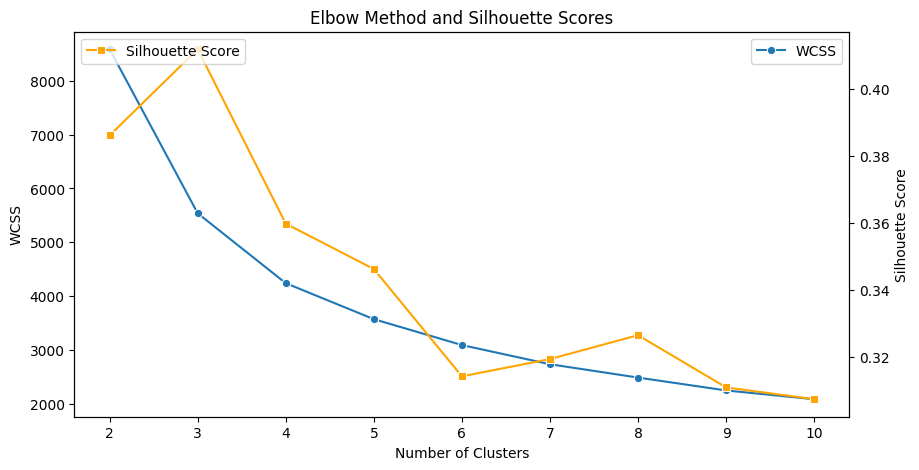

In [56]:
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_table)


wcss = []  # list of Within Cluster sum of squares
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(rfm_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

    wcss.append(kmeans.inertia_)

best_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

def plot_wcss_silhouette(wcss, silhouette_scores):

    plt.figure(figsize=(10, 5))

    # Elbow  plot
    ax1 = sns.lineplot(x=range(2, 11), y=wcss, marker='o', label='WCSS')

    # Silhouette scores plot
    ax2 = plt.twinx()
    sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='s',
                 color='orange', label='Silhouette Score', ax=ax2)

    ax1.set_xlabel('Number of Clusters')
    ax1.set_ylabel('WCSS')
    ax2.set_ylabel('Silhouette Score')

    ax1.grid(False)
    ax2.grid(False)


    plt.title('Elbow Method and Silhouette Scores')
    plt.legend(loc='upper left')

plot_wcss_silhouette(wcss, silhouette_scores)

print(f'The optimal number of clusters for KMeans based on maximum Silhouette Score is: {best_num_clusters}')

Both elbow and silhouette score methods identify 3 as the best parameter for the model.


Next code applies the KMeans clustering algorithm to the standardized RFM (Recency, Frequency, Monetary) data. It predicts the cluster of consumers and add it to the rfm_table. It then calculates the silhouette score to evaluate the clustering quality. The function plot_rfm_predicted uses a 3D scatter plot to visually represent the predicted clusters based on Recency, Frequency, and Monetary values.

In [57]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm_table['Cluster'] = kmeans.fit_predict(rfm_scaled)

silhouette_avg = silhouette_score(rfm_scaled, rfm_table['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

def plot_rfm_predicted(rfm_table, optimal_k):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in range(optimal_k):
        cluster_data = rfm_table[rfm_table['Cluster'] == cluster]
        ax.scatter(cluster_data['Recency'], cluster_data['Frequency'],
                   cluster_data['Monetary'], label=f'Cluster {cluster + 1}')


    ax.set_xlabel('Recency')
    ax.set_ylabel('Frequency')
    ax.set_zlabel('Monetary')
    ax.set_title('Predicted consumer clusters')

    ax.legend()

Silhouette Score: 0.41198074025339143


# Project Outcome (10 + 10 marks)

## Overview of Results


This project delved into the Global Superstore dataset. Initially, we checked the data quality and prepared the dataset. Our comprehensive data analysis covered different aspects of the company's operations. Firstly, we examined patterns in overall sales and profit over time. Secondly, we delved into sales and profit specifics across various product categories and geographical regions, identifying potential issues and patterns. The analysis also extended to logistics, focusing on shipping methods, costs, and durations. Lastly, we implemented a cluster algorithm for customer segmentation based on their unique shopping traits. This segmentation aims to provide a foundation for effective marketing strategies, offering valuable insights into customer behaviours.



## Objective 1

### Explanation of Results

This section undertakes an analysis of the correlation among sales revenue, profit, and temporal factors. Additionally, it employed the ARIMA model to forecast the forthcoming trend in profit within the time series.

As shown in Figure 1, an overall upward trend in both sales revenue and profit is observed, with similar patterns of variation. At the year's end, sales revenue and profit exceeded more than double the figures observed at the beginning of the year. Complementing this observation, Figure 2 demonstrates a significant surge in sales revenue and profit every June, followed by a sharp decline in July, reaching levels akin to the beginning of the year. Subsequently, there is a notable surge in August, with figures rebounding to levels similar to those observed in June, followed by sustained growth in September. October sees a minor dip, followed by continued growth in November and December, culminating in the highest values of the year. Furthermore, it is noticeable that from 2011 to 2013, both profit and sales revenue exhibited an annual increase.

What stands out in Figure 3 is that fluctuation in profit and sales revenue is relatively moderate from a monthly perspective. However, there is an upward trend in the mid-month and a downward trend towards the end of the month.

The bar chart in Figure 4 presents the summary statistics for sales revenue for each quarter from 2011 to 2014. The graph illustrates a cyclical pattern in the sales trend. Despite the cyclical nature, sales gradually rise from the first to the fourth quarter of each year. Comparatively, there is a substantial decline in sales in the first quarter of each year compared to the previous year. However, on the whole, there is a yearly increment observed in sales.

Figure 5 illustrates using the trained LSTM model to predict future profits. Data analysis reveals significant fluctuations and cyclic patterns, hence the selection of the LSTM algorithm for data prediction. Input data to the model could be profit data from a certain period in the past, and the model forecasts future profit based on historical patterns. The model comprises input layers, LSTM layers (with a certain number of neurons), output layers, etc.During this process, the dataset is divided into training and testing sets. Ensure the data is arranged in chronological order and transform it into sequences suitable for LSTM input.The graph indicates the necessity for further refinement and optimisation of the algorithm.


### Visualisation

#### Figure 1: Bar and line plot illustrating the monthly profit trends

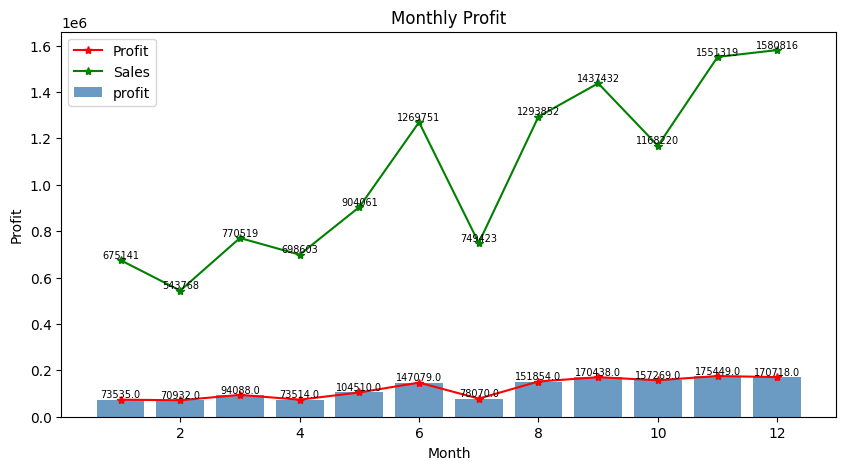

<Figure size 640x480 with 0 Axes>

In [58]:
monthly_profit()

#### Figure 2: Line plots depicting annually profit trends and sales trends from 2011-2013 respectively.

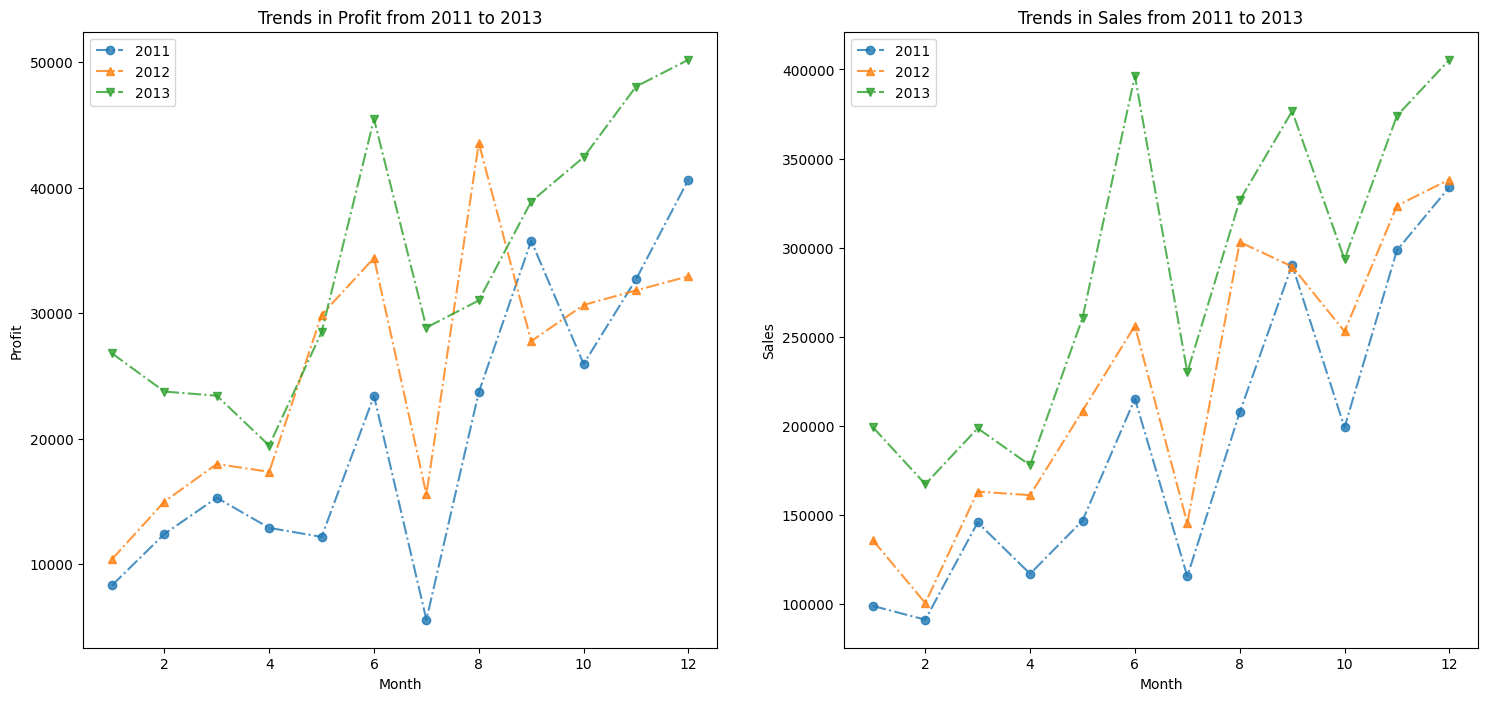

In [59]:
ymplot(df_sales_time,'Year','order_month')

### Figure 3: A bar and line chart depicting daily sales and profit over a one-month period

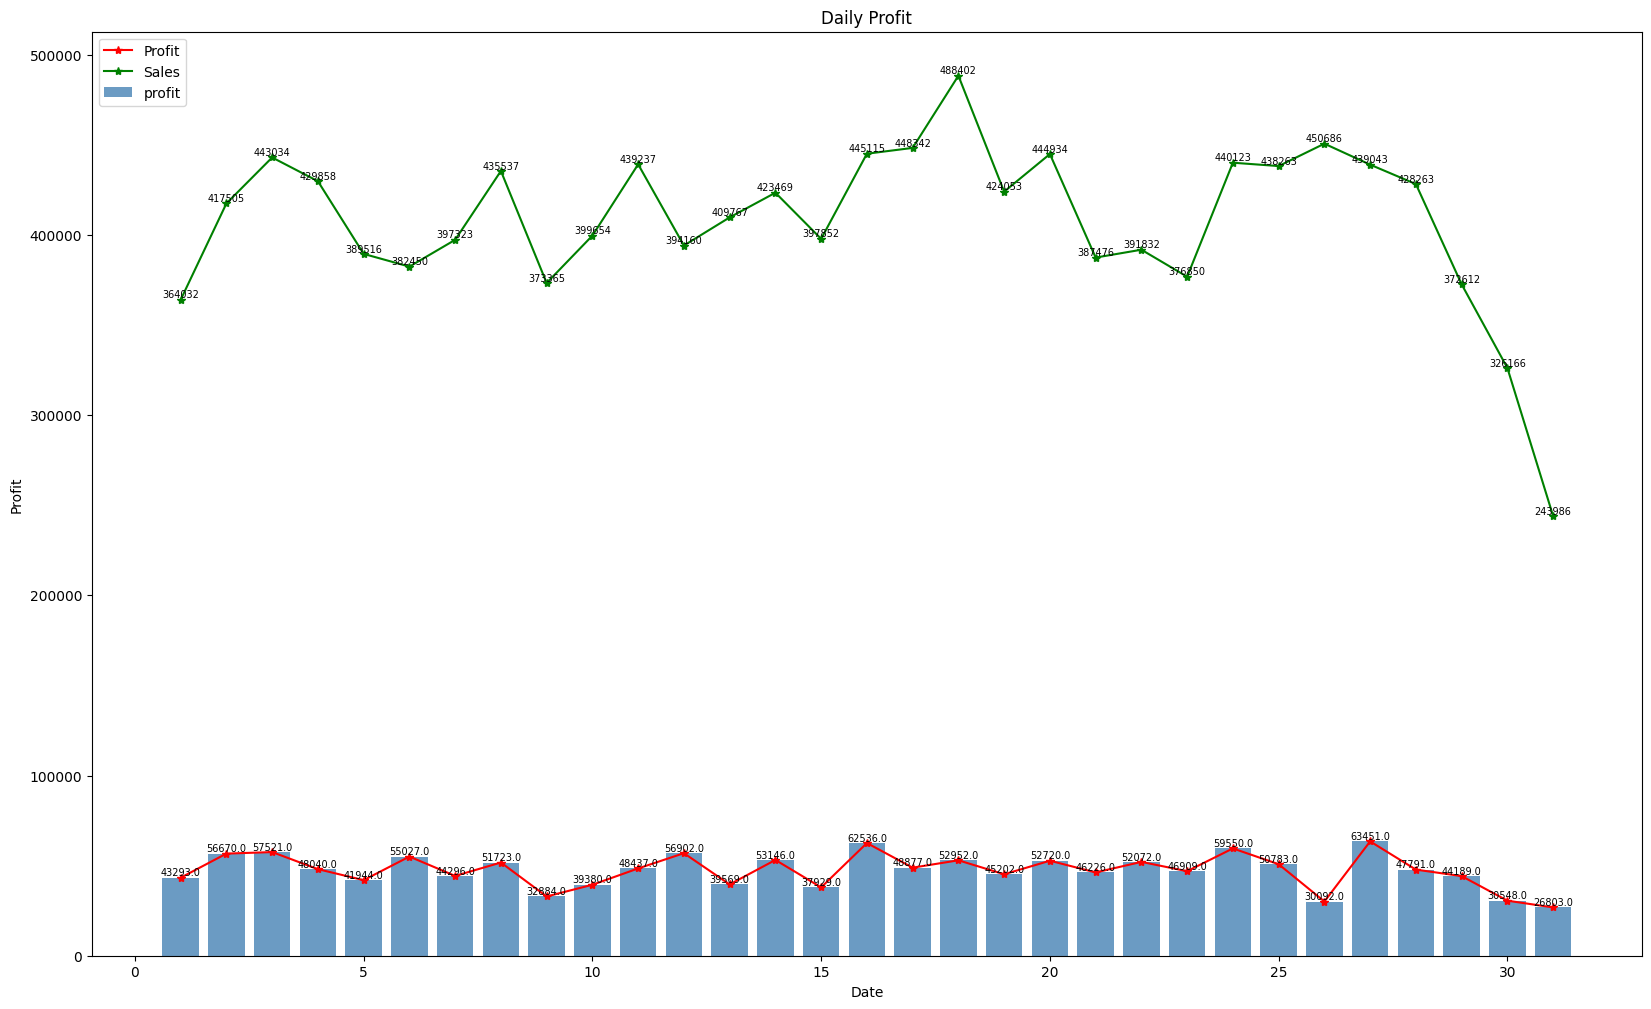

<Figure size 640x480 with 0 Axes>

In [60]:
date_profit()

### Figure 4: A bar chart depicting sales revenue for each quarter

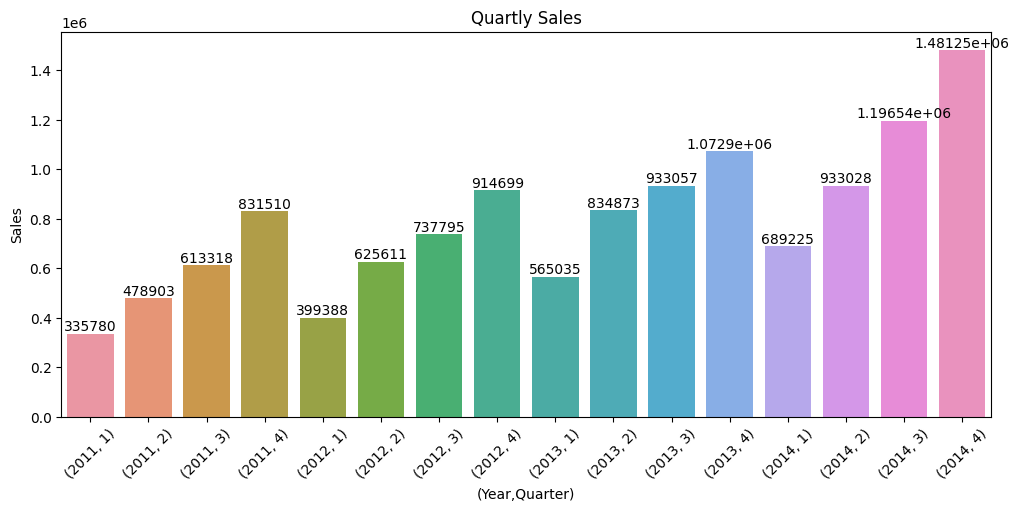

In [61]:
year_quarter()

### Figure 5:The fitting result

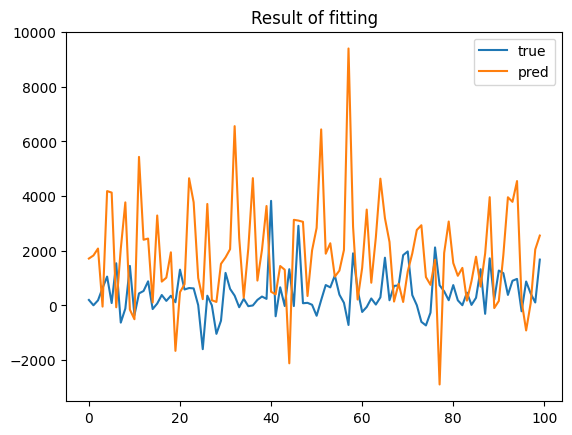

In [62]:
plot_fit(raw_value[:100],predictions)

## Objective 2

### Explanation of Results

Analysing products' sales and profits and examining these patterns in different regions and countries provides valuable insights into the performance of a global superstore. The first figure (Figure 1) shows profits across product subcategories. The chart highlights Copiers as the most profitable subcategory, while Tables emerge as the least profitable, being the only one with a recorded loss. Figure 2 shows a bar chart depicting profit margins. Here, Tables again stands out with a negative profit margin, indicating challenges unique to this product.

To dig deeper into the issue surrounding Tables, Figure 3 inspects the sales, profits, and profit margins of tables from 2011 to 2014. Despite consistent sales, the plot shows a concerning trend starting from 2012. While sales continue to rise, profits take a downward turn. This raises a crucial question: why is the profitability of Tables declining despite sustained sales?

The uniform distribution of losses across regions and brands for table products (68% of 134 distinct products) may indicate a potential challenge stemming from intense market competition. Examining the sales performance of competitors can provide additional insights into the impact of competitive dynamics. Since most of the table brands in this company are at a loss and tables are the only loss-generating product, It is unlikely that supply chain issues and economic factors have an impact. Heightened competition in the furniture sector, particularly for tables, may manifest itself in aggressive pricing and market saturation. A strategic shift towards other product categories and reducing emphasis on tables could probably be a viable solution.

Moving to region analysis, the world map in Figure 4 illustrates the profit distribution, emphasising key contributors such as the USA, China, and India, while Turkey faces the highest losses. Figure 5 delves into average sales and profits across regions, showing substantial figures in the Central US and North Asia, while EMEA (Europe, Middle East and Africa) lags in both metrics. Figure 6, a bar chart, displays sales in the main categories (technology, office supplies, and furniture) across regions where the Central US consistently leads, followed by the South US. Lastly, Figure 7 portrays the sales trend in regions over the entire period, showing stable figures in the South and West US and Canada, while other regions experience more fluctuations.


### Visualisation

#### Figure 1: Total Profits by Sub-Category

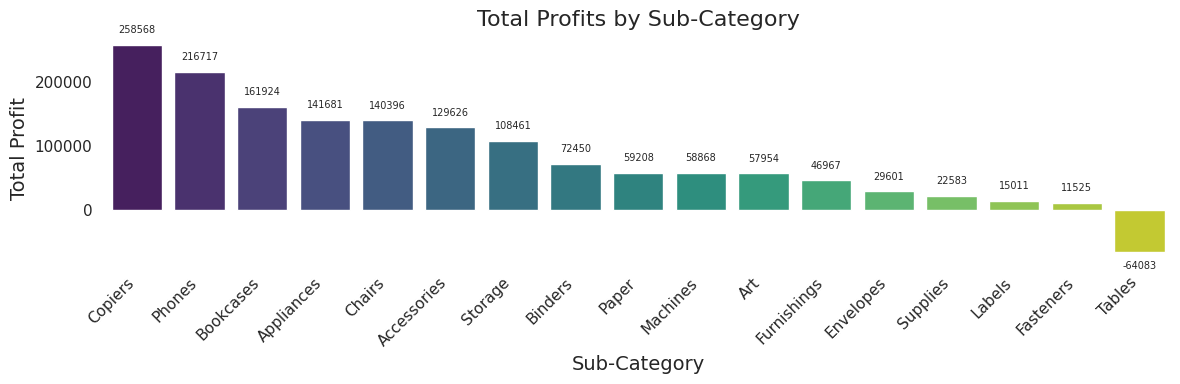

In [63]:
draw_subcategory_bar_chart(sorted_df_profits,y_axis ="Profit", ylabel='Total Profit', xlabel='Sub-Category', title='Total Profits by Sub-Category')

#### Figure 2: Profit Margin by Sub-Category

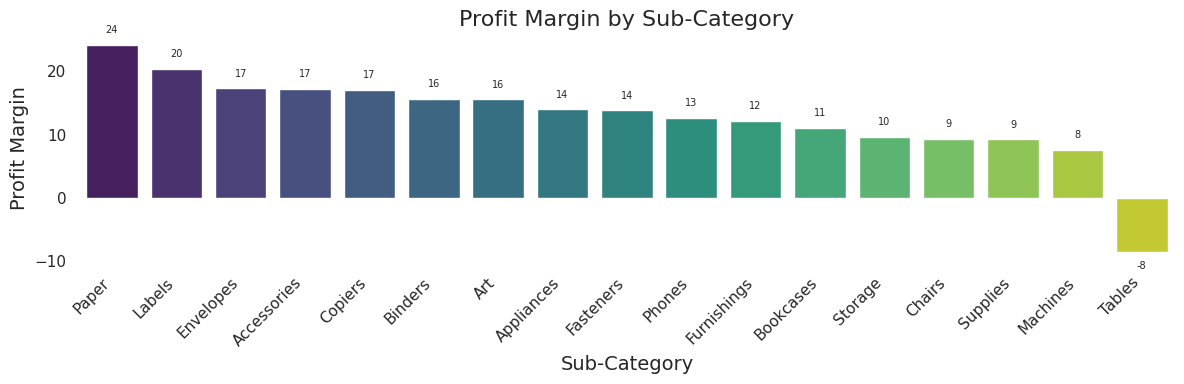

In [64]:
draw_subcategory_bar_chart(df_Margin_profits_sorted, y_axis ="Profit_Margin", ylabel='Profit Margin', xlabel='Sub-Category', title='Profit Margin by Sub-Category')

#### Figure 3: Trend of Sales and Profit for Tables

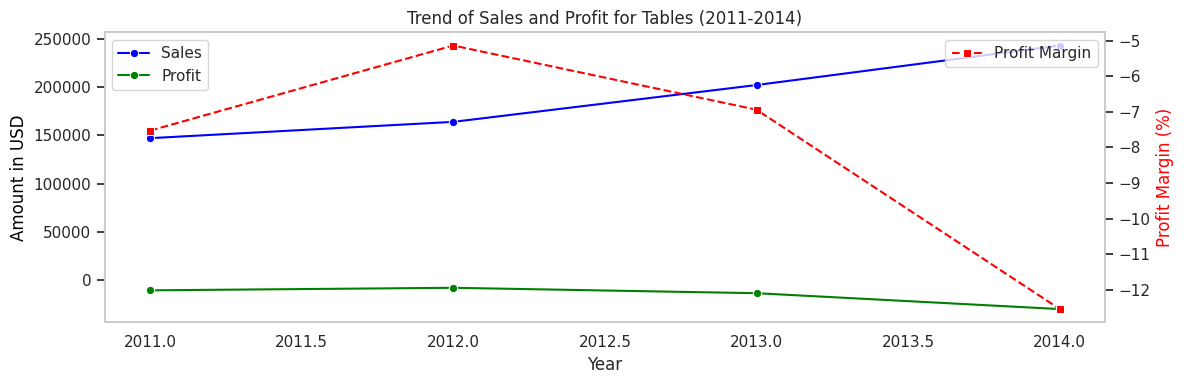

In [65]:
plot_profit_sale_margin(dataframe = df_yearly_profit)

#### Figure 4: Total Profit by Country

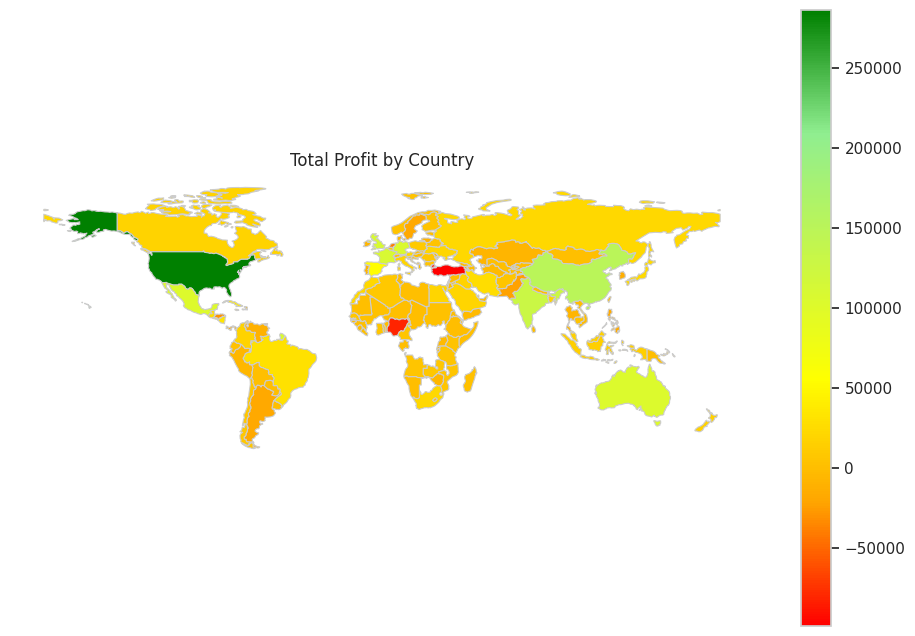

In [66]:
plot_total_profit_by_country(world, df)

#### Figure 5: Average Sales, Profit, and Profit Ratio by Region

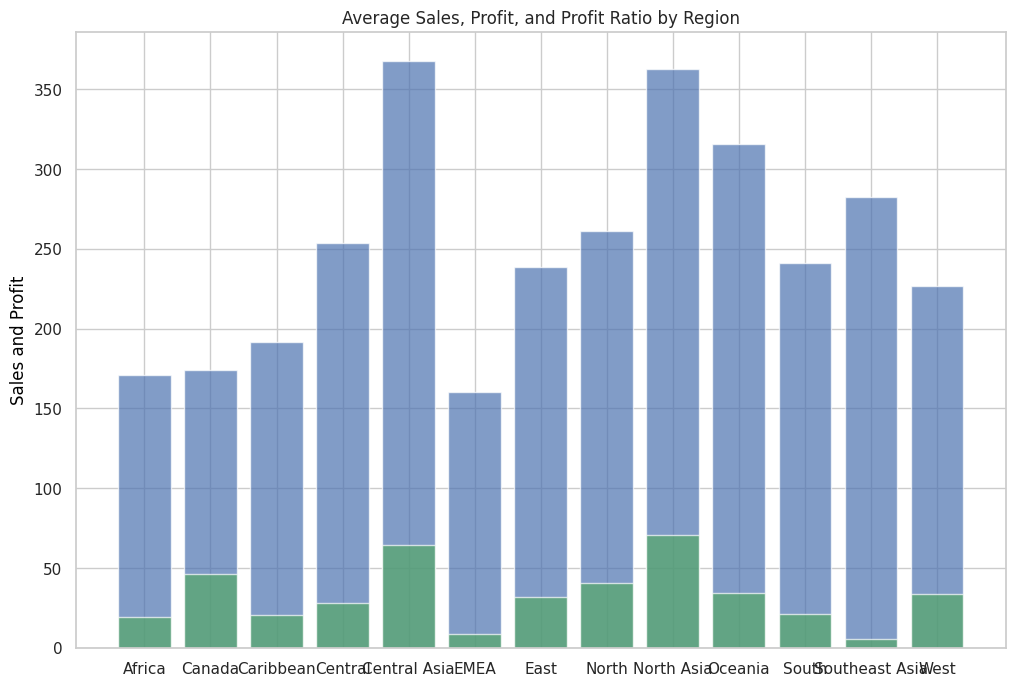

In [67]:
plot_region_profit_ratio(df)

#### Figure 6: Sales Distribution by Category and Region

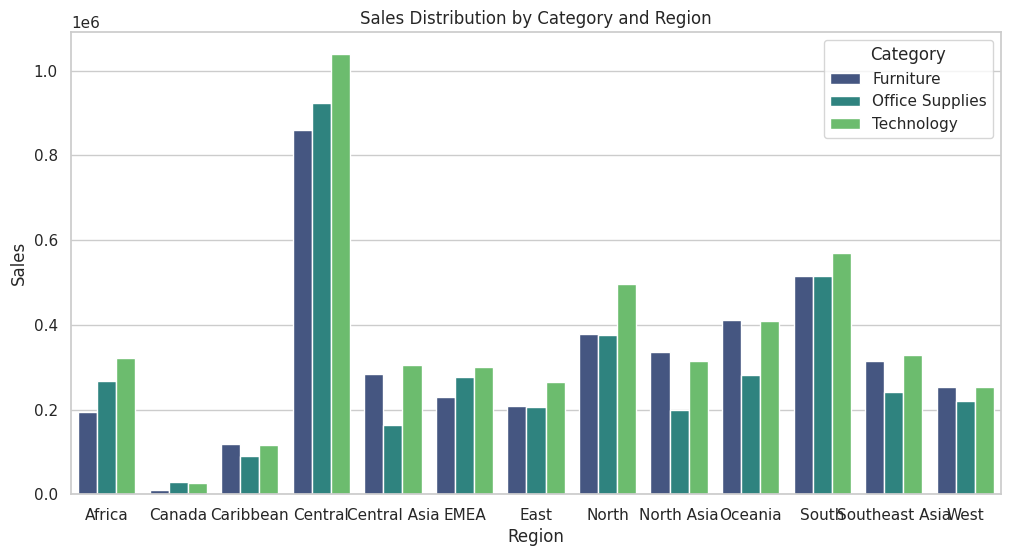

In [68]:
plot_bar_chart(sales_by_category_region, 'Region', 'Sales', 'Category', palette='viridis', title='Sales Distribution by Category and Region')

#### Figure 7: Sales Trends in Central

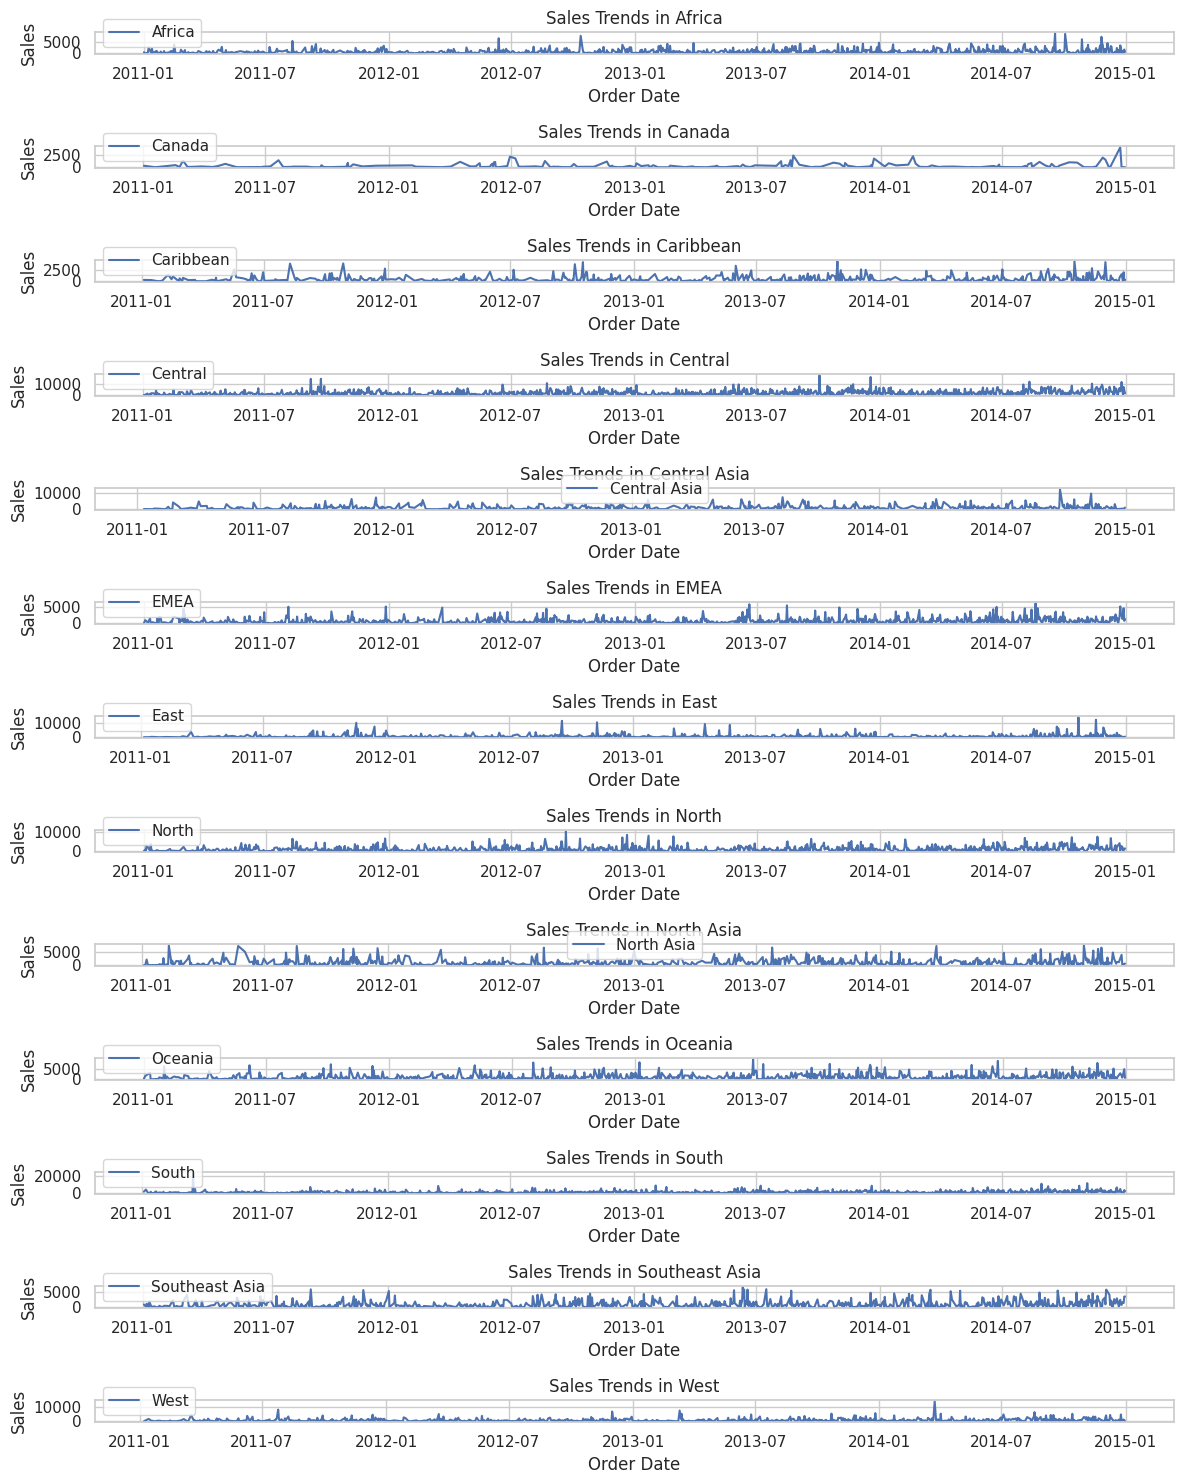

In [69]:
plot_sales_trends_by_region(df)

## Objective 3

### Explanation of Results

Analysing shipping data may offer valuable insights into the company's shipping practices, potentially shedding light on the relationship between shipping mode and priority, costs, and profits. Figure 1 seems to highlight a possible relationship between the priority of orders and shipping methods. It appears that Standard class is typically a go-to option, but for urgent orders, first-class and same-day options might be chosen, as suggested in Figure 2. Figures 3 and 4 aim to explore if the type of products could influence shipping choices. Interestingly, it appears that the same proportion of shipping methods are used for each category of product, which may suggest that the nature of the goods doesn't significantly impact shipping decisions, as illustrated in the charts.


When examining the cost dynamics over time in Figure 5, we observe that the average shipping cost (green line) seems to be inversely related to shipping time and is generally lower for higher shipping times, almost half for 6-day deliveries compared to one or two days. This finding is not particularly surprising. However, after six days, the cost appears to increase. It was found that for some orders, shipping costs were unusually high at around 900 dollars, constituting approximately 30 per cent of the sales figures (see code output of line), a matter that might warrant further investigation by the company. On average, it takes about four days for a product to be delivered, and the average cost of shipping is around 26 dollars.

The heatmap in Figure 6 could reveal that destinations and shipping modes may influence costs. The standard class has the lowest cost and is relatively the same for different regions, but for higher classes, the cost seems to differ across regions. For Central and North Asia and Oceania, the costs for first-class and same-day delivery were significantly higher than in other regions. In Figure 7, we notice that higher shipping classes are not necessarily associated with higher profits.

### Visualisation

### Figure 1: Number of Orders by Order Priority and Ship Mode

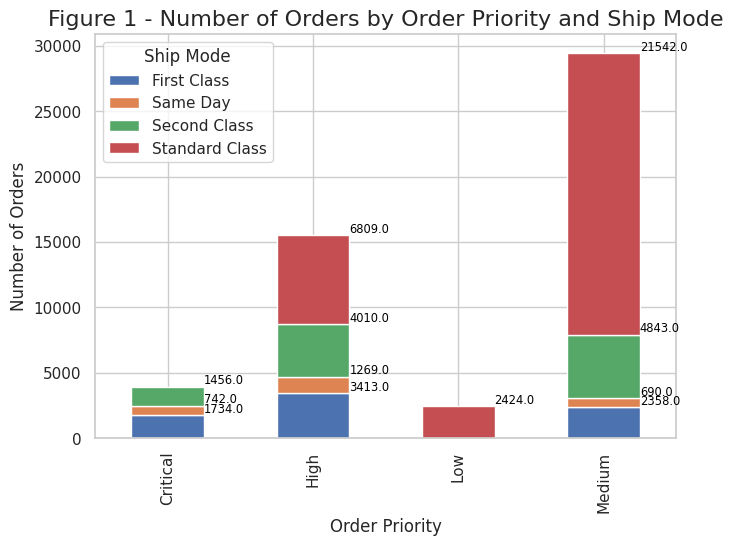

In [70]:
create_stacked_bar_chart(df)

### Figure 2 Distribution of shipping modes across orders with different priorities

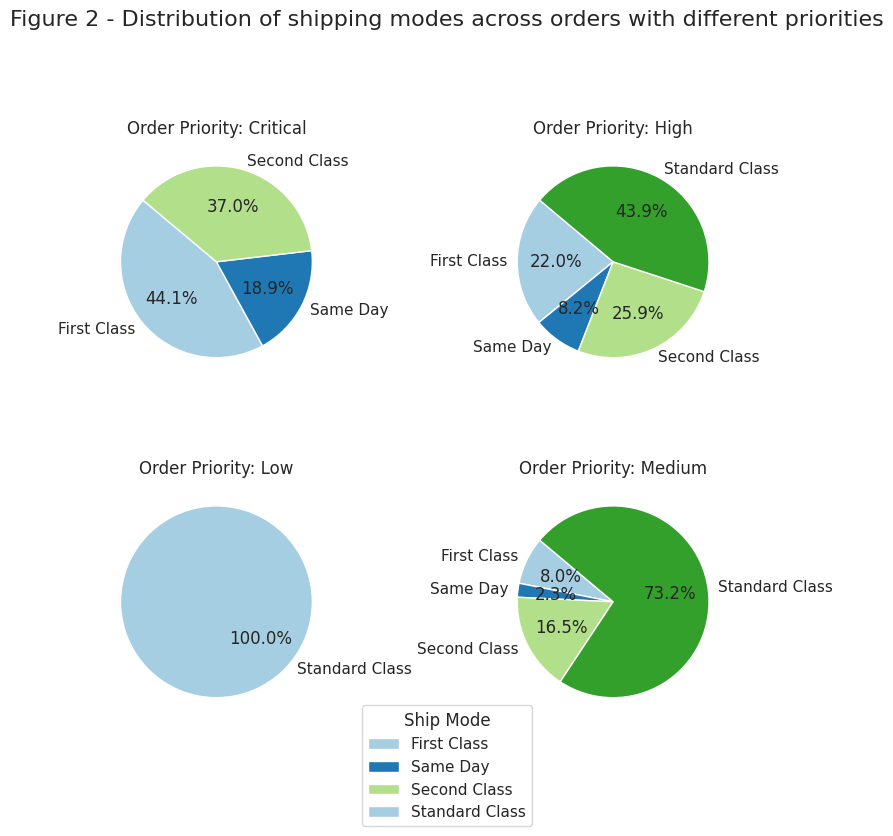

In [71]:
create_pie_charts_priority(df)

### Figure 3: Number of Orders by Category and Ship Mode

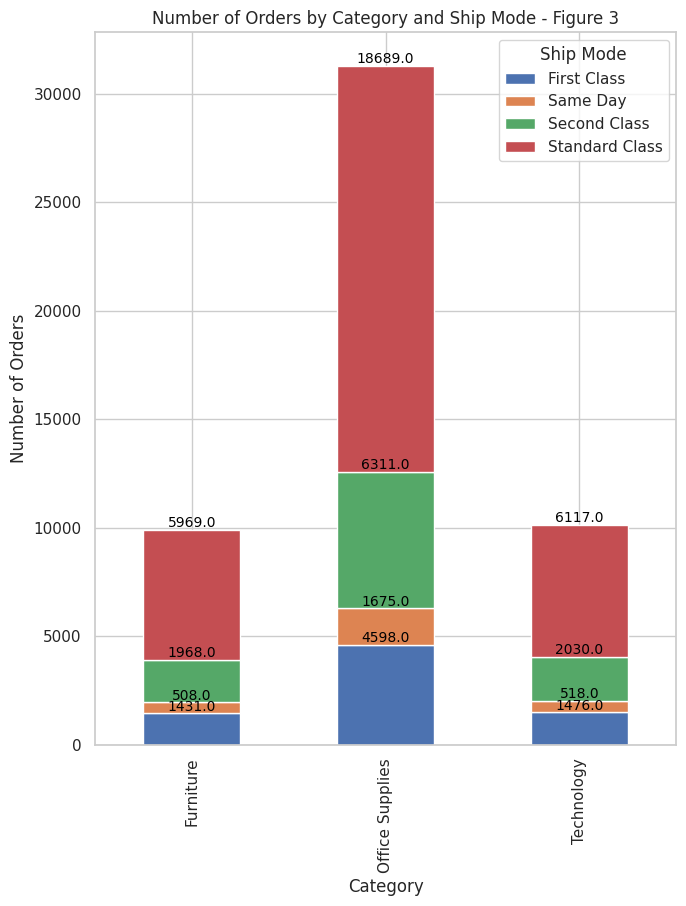

In [72]:
create_stacked_bar_chart_categories(df)

### Figure 4: Distribution of shipping modes across product categories

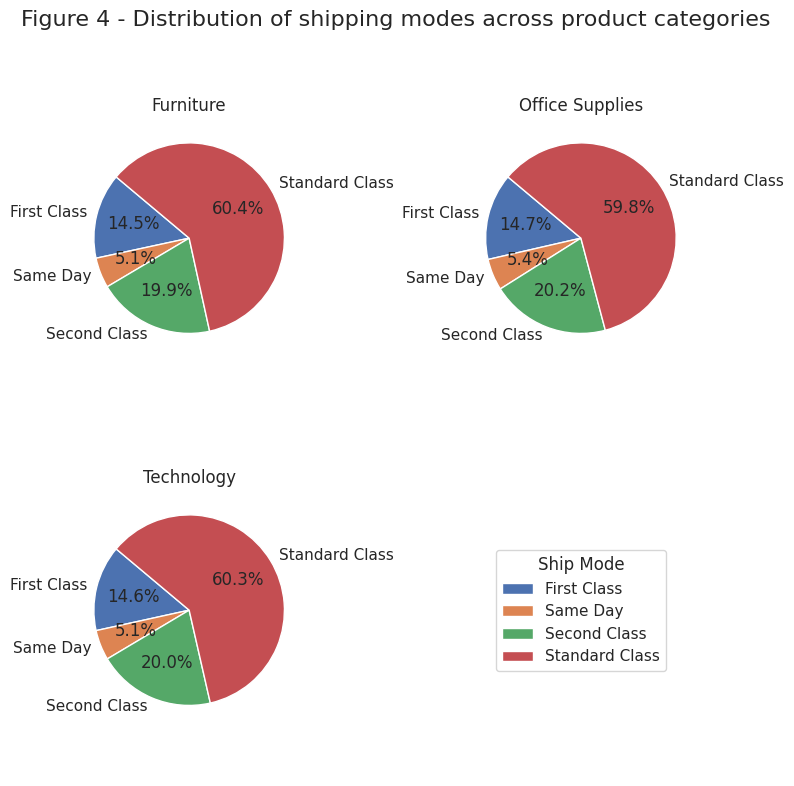

In [73]:
create_pie_charts(df)

### Figure 5: Shipping Time vs Average Shipping Cost

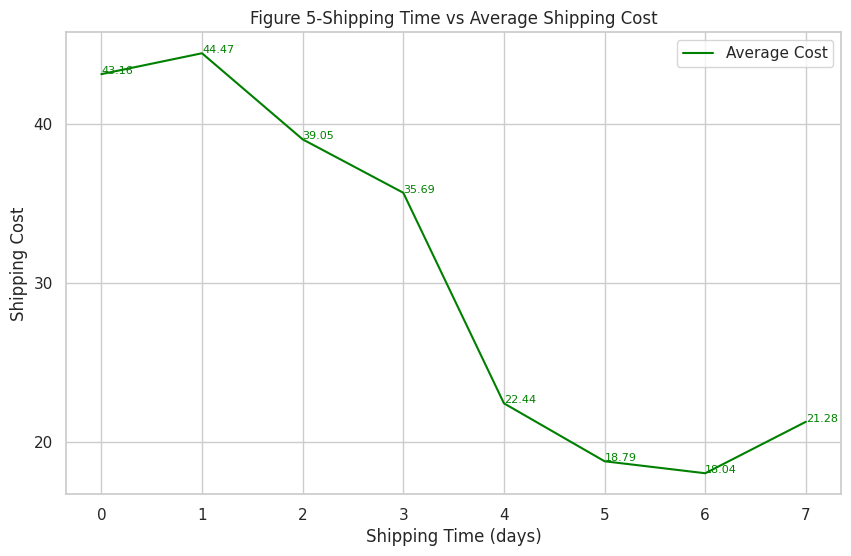

In [74]:
plot_shipping_time_cost_statistics(df)

### Figure 6: Average Cost by Ship Mode and Region

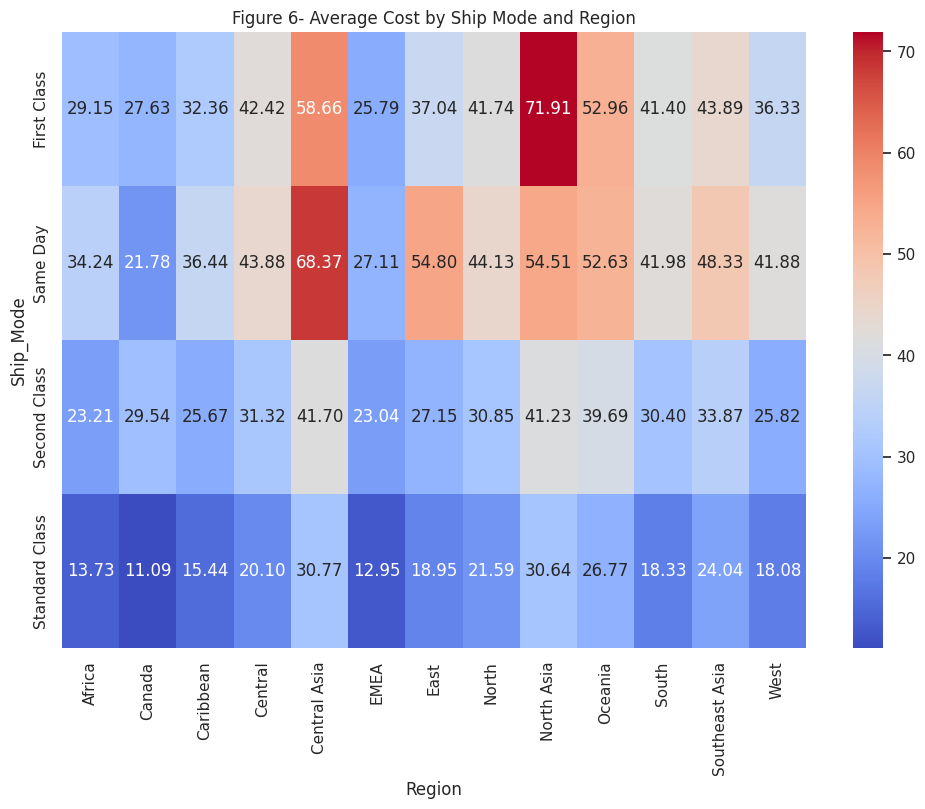

In [75]:
create_heatmap(df, "Cost")

### Figure 7: Average Profit by Ship Mode and Region

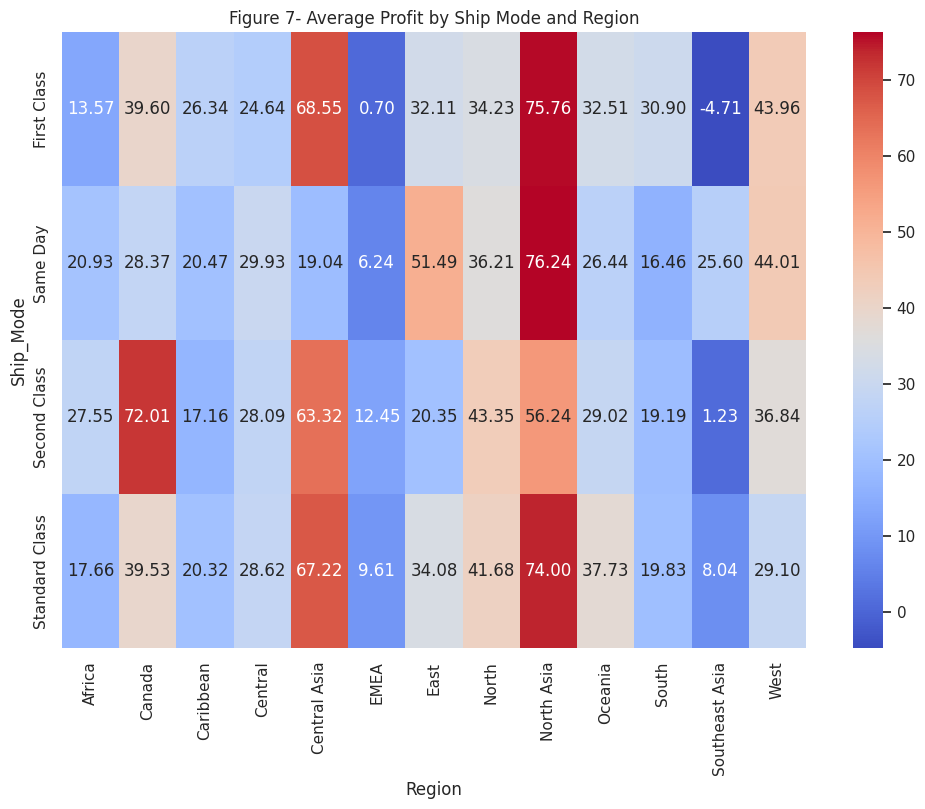

In [76]:
create_heatmap(df, "Profit")

## Objective 4

### Explanation of Results

In our exploration of the global superstore dataset, our last objective was to gain insights into customer behaviour through RFM (Recency, Frequency, Monetary) metrics and apply clustering techniques to them for customer segmentation. Recency measures the time passed since a customer's last purchase, Frequency shows how often they buy, and Monetary indicates the total spending. Analysing these helps understand customer behaviour, revealing valuable insights for tailored marketing strategies. We calculated these metrics from order dates, order counts, and sales amounts in our dataset.

Figure 1 provides a visual overview of the distributions of recency, frequency, and monetary values. Examining the charts, it appears that both the time since the last purchase (recency) and the total amount spent (monetary) follow an exponential pattern. In other words, as we look further back in time (more days since the last purchase) or consider higher amounts spent, the number of corresponding customers decreases exponentially, initially at a rapid pace and then gradually. Furthermore, the frequency of purchases peaks at around 10. Most customers placed between 5 to 10 orders in the entire period.

As we delved into the clustering process, we opted for the KMeans model to group customers based on their similarity in RFM characteristics. The choice of the model was driven by its effectiveness in identifying distinct segments within the data. We employed the elbow method and silhouette score to determine the optimal number of clusters for our analysis. A graphical representation is shown in Figure 2. The elbow method helps identify the point (number of clusters) where the reduction in within-cluster variance begins to slow down (which in our case was three), assisting in selecting an appropriate number of clusters.

Following this optimisation step, we applied the KMeans clustering algorithm to our RFM data. The results are visually represented in Figure 3, where each point corresponds to a unique customer. The three-dimensional scatter plot showcases how customers are grouped into clusters based on recency, frequency, and monetary values.

The clustering results offer valuable insights for marketing strategies. By identifying distinct customer segments, the global superstore can tailor its approach to meet the specific preferences of each group. This targeted strategy enables more effective marketing campaigns and improved customer satisfaction.


### Visualisation

### Figure 1: RFM

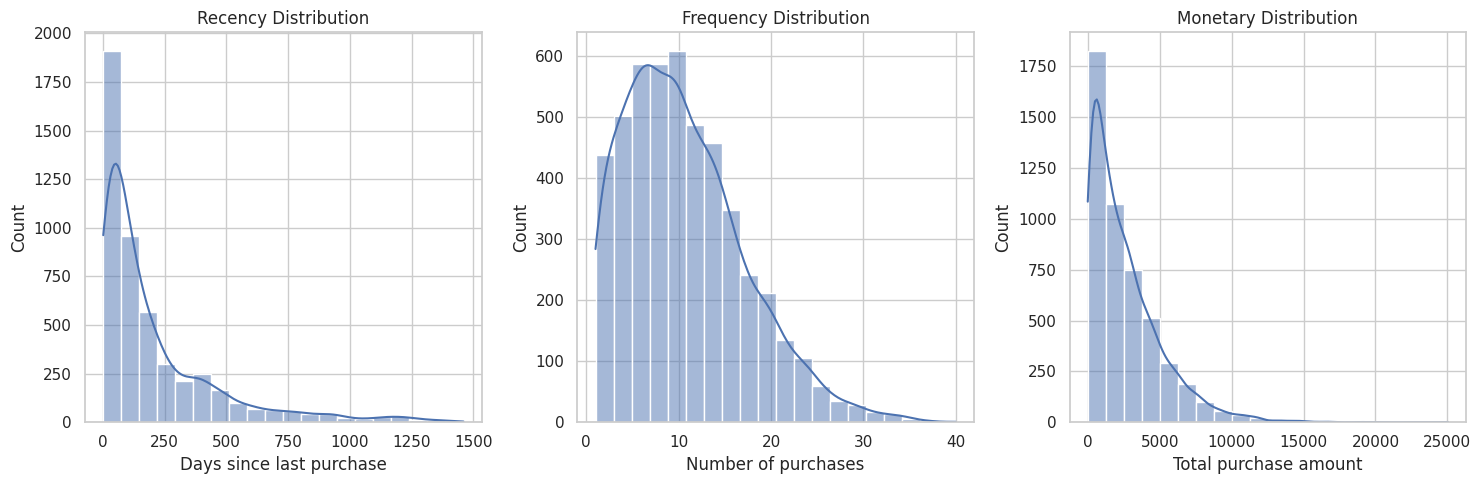

In [77]:
plot_rfm_hist(rfm_table)

### Figure 2: Elbow Method and Silhouette Scores

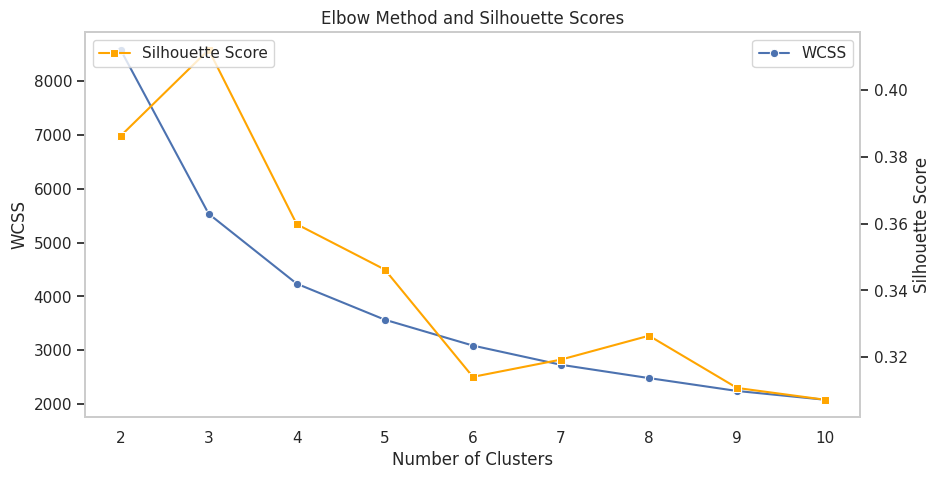

In [78]:
plot_wcss_silhouette(wcss, silhouette_scores)

### Figure 3: Predicted consumer clusters

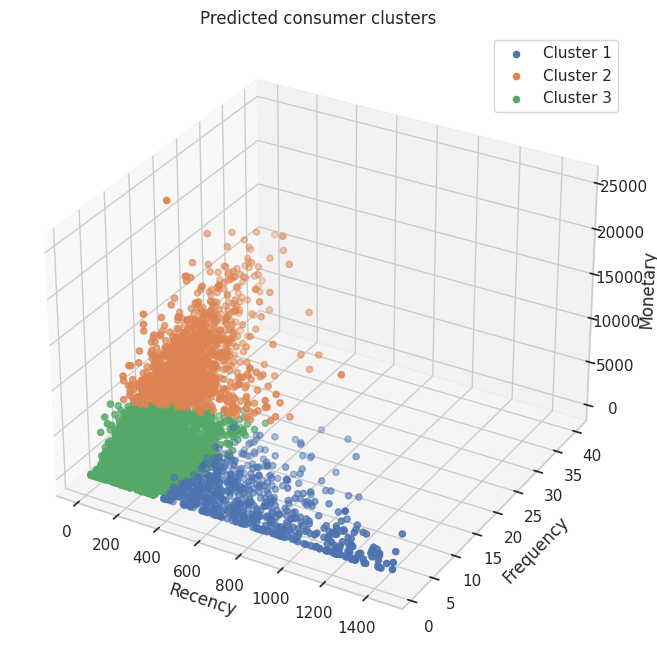

In [79]:
plot_rfm_predicted(rfm_table, optimal_k)

# Conclusion


### Achievements

_In our comprehensive study of the global superstore dataset, we explored the relationship between sales and profits over time and successfully employed the LSTM algorithm to create a model for predicting future profits._

_We delved into customer behaviour analysis through RFM metrics, uncovering patterns in recency, frequency, and monetary values and employed The KMeans clustering algorithm to segment customers based on these metrics, revealing distinct segments that inform targeted marketing strategies._

_We conducted an exploratory analysis, which highlighted sales patterns across regions and products, pinpointing photocopiers as the most profitable item and identifying tables as the least profitable one. Our analysis illuminated upward sales trends despite fluctuating profits for specific categories. Seasonal sales fluctuations and their impact on profits were also observed._

_Additionally, our study examined the relationship between transportation methods, product types, and costs, uncovering an inverse relationship between transportation costs and time, regardless of the nature of the products. When suitable, we presented explanations and potential reasons for observed patterns._


### Limitations

_The project faces challenges due to the restrictions in both the size of the data sample and the overall scope. The analysis of sales patterns across different regions is limited by the data available, which may not fully capture the bigger picture of the global market. It's worth noting that in analysing a business and company, a comprehensive understanding requires the consideration of market dynamics and the performance of peer companies, aspects to which we lacked access in this study._


_Additionally, the time series analysis of profit did not cover all possible influencing factors. The analysis of transportation methods did not include all possible transportation options and destinations. To arrive at a more general result, it might be necessary to expand the existing dataset._

### Future Work

_For future works, our research will extend data collection to include a broader array of regions and timeframes to enhance understanding of global sales patterns. We aim to explore the influence of socioeconomic status and education levels on consumption habits. Further investigations will assess the specific impacts of transportation methods on sales and profits, alongside their environmental ramifications, as we seek more efficient and eco-friendly transportation solutions. This future work will deepen our insights into market dynamics and customer segmentation, driving more effective business strategies and better environmental practices. Moreover, the predictive model will be further adjusted to achieve better performance._